In [260]:
# Victor Z and Ugochukwu Ikegwu
# UW-Madison, 2024
# NN prediction for gibbs data

## Start here if working on google collab

In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [263]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [264]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import gaussian_process as gpr
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process.kernels import RBF

In [266]:
# Load data
filename = path+'Data/gibbs_hightemp_class.dat'
# read text file into pandas DataFrame
datahigh = pd.read_csv(filename, sep="\t", header=None)
datahigh.head(5)

,0,1,2
0,613.15,166.977686,0.536382
1,613.15,170.710337,0.546996
2,613.15,141.174815,0.455329
3,613.15,146.628653,0.473593
4,613.15,164.665427,0.529668


In [267]:
# Load data
filename = path+'Data/gibbs_lowtemp_class.dat'
# read text file into pandas DataFrame
datalow = pd.read_csv(filename, sep="\t", header=None)
datalow.head(5)

,0,1,2
0,583.15,166.977686,0.744386
1,583.15,170.710337,0.752465
2,583.15,141.174815,0.677784
3,583.15,146.628653,0.693596
4,583.15,164.665427,0.739204


In [268]:
# Concatenate both tables
data = pd.concat([datahigh, datalow])
datan = data.copy()
n = len(datan)

In [269]:
np.random.seed(0) # to ensure reproducibility

# Generate inputs (temperature and pressure) with random noise
inputs = data.iloc[:, :2].T + np.random.rand(2, n) * 0.1

# Generate targets (yield) with random noise
targets = data.iloc[:, 2].T + np.random.rand(n) * 0.1

In [279]:
targets.T.head(10)

0    0.595670
1    0.548002
2    0.502912
3    0.544470
4    0.534066
5    0.595931
6    0.541795
7    0.478782
8    0.463886
9    0.691407
Name: 2, dtype: float64

In [280]:
inputs.T.head(10)

,0,1
0,613.204881,167.008724
1,613.221519,170.747641
2,613.210276,141.227312
3,613.204488,146.703713
4,613.192365,164.698778
5,613.214589,157.525812
6,613.193759,151.709921
7,613.239177,147.279434
8,613.246366,137.170104
9,613.188344,189.402869


In [272]:
# Define and train neural network
seed = 2024
net = MLPRegressor(hidden_layer_sizes=(4,), random_state=seed, max_iter=10000)
net.fit(inputs.T, targets)
outputs = net.predict(inputs.T)
errors = targets - outputs
performance = np.mean(errors**2)
eps2 = errors

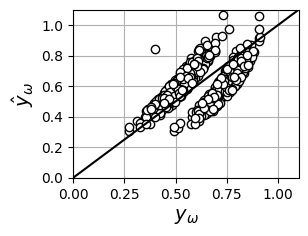

In [273]:
plt.subplot(2, 2, 2)
xx = np.linspace(0, 1.1)
plt.plot(targets, outputs, 'ko', markerfacecolor='w')
plt.grid()
plt.plot(xx, xx, 'k-')
plt.xlabel(r'$y_\omega$', fontsize=14)
plt.ylabel(r'$\hat{y}_\omega$', fontsize=14)
plt.axis([0, 1.1, 0, 1.1])

plt.show()

In [274]:
# Define and train Gaussian Process Regression (GPR)
kernel = gpr.kernels.Matern(length_scale = 1, nu = 1.5)
gprMdl = gpr.GaussianProcessRegressor(kernel = kernel,
                                      normalize_y = True,
                                      n_restarts_optimizer = 10)
gprMdl.fit(inputs.T, targets)

# Predict with Gaussian Process Regression (GPR)
outputsgpr, outputsd = gprMdl.predict(inputs.T, return_std=True)
outputsci = outputsgpr - 1.96 * outputsd  # Lower confidence interval
eps = targets - outputsgpr


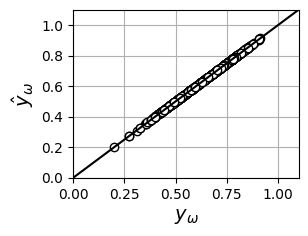

In [275]:
# Plot fits
plt.figure(1)
plt.subplot(2, 2, 1)
xx = np.linspace(0, 1.1)
plt.plot(targets, outputsgpr, 'ko', markerfacecolor='w')
plt.grid(True)
plt.plot(xx, xx, 'k-')
plt.xlabel('$y_\omega$', fontsize=14)
plt.ylabel('$\hat{y}_\omega$', fontsize=14)
plt.axis([0, 1.1, 0, 1.1])

plt.show()